In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

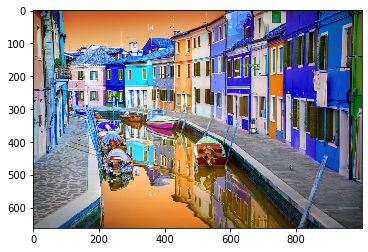

In [2]:
image = cv2.imread('colorpic.jpg')
plt.imshow(image)

In [3]:
type(image)

numpy.ndarray

In [4]:
np.shape(image)

(662, 1000, 3)

In [5]:
image.dtype

dtype('uint8')

In [6]:
image.ndim

3

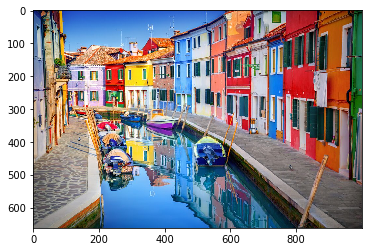

In [7]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [8]:
#Applying KMeans Algorithm To Identify Colors In The Image

#reshape to flattened array
img = image.reshape((image.shape[0] * image.shape[1], 3))

In [9]:
#n_clusters -> no. of dominant colors
n_clusters = 8

In [10]:
kmeans = KMeans(n_clusters)
kmeans.fit(img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
#colors -> pixel value of 10 most dominant colors

colors = kmeans.cluster_centers_
colors

array([[229.0668728 , 158.14306671,  84.04644759],
       [ 45.29525387, 114.56733173, 196.71183057],
       [101.71130902, 167.92049356, 231.18865359],
       [ 30.22809448,  52.93324258,  55.6951337 ],
       [108.6003734 , 101.35140126, 102.120293  ],
       [211.63416212, 206.97240348, 207.85336144],
       [161.96470732, 150.46980087, 149.87286358],
       [178.92177882,  52.50309172,  28.40327736]])

In [12]:
#labels for each pixels

labels = kmeans.labels_
labels

array([3, 3, 3, ..., 3, 3, 3])

In [13]:
np.size(labels)

662000

In [14]:
#counter() -> count of pixels

counts = Counter(labels)
counts

Counter({3: 125444,
         4: 97795,
         7: 71652,
         0: 44362,
         1: 67617,
         6: 106459,
         5: 89847,
         2: 58824})

In [15]:
#sorted() -> sorts the counts

sorts = sorted(counts.items())
sorts

[(0, 44362),
 (1, 67617),
 (2, 58824),
 (3, 125444),
 (4, 97795),
 (5, 89847),
 (6, 106459),
 (7, 71652)]

In [16]:
#dict() -> creates dictionary

counts = dict(sorts)
counts

{0: 44362,
 1: 67617,
 2: 58824,
 3: 125444,
 4: 97795,
 5: 89847,
 6: 106459,
 7: 71652}

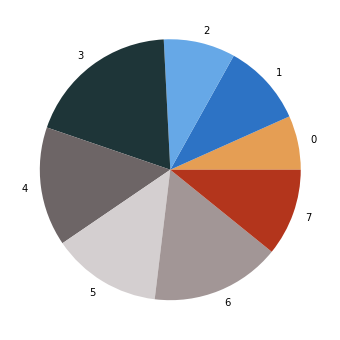

In [17]:
#piechart for dominating colors

fig = plt.figure(figsize = (12, 6))
plt.pie(counts.values(), labels = counts.keys(), colors = np.array(colors/255))
plt.show()